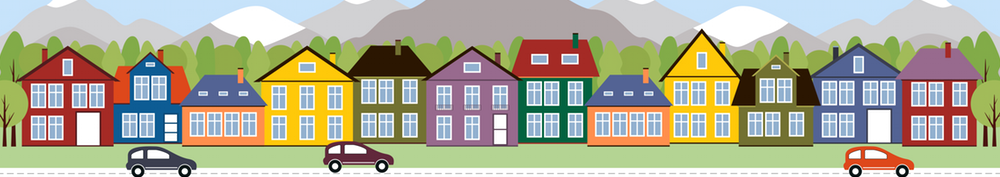

Time flies! You have now learned and (hopefully) mastered all the skills required to build a real-world ML regression model! These skills include:

- Exploratory data analysis (EDA)
- Data pre-processing and feature engineering: scaling, imputation, encoding...
- A suite of regression models: linear regression, trees, forests, ...
- Hyperparamter tuning: CV, GridSearch...
- Model evaluation

Now it is time to deploy these skills in the real world, build your first "real" ML project, and see how you perform against other data scientists from all over the world!

We will join this active Kaggle competition to predict house prices:


https://www.kaggle.com/c/house-prices-advanced-regression-techniques

You will find the detailed description of the competition from above web site, and can download the data directly there. 

**Requirements:**

- Please use this notebook to create your code, explanation, graphs, and results just like what you did for your homework.
- Each group should create a Kaggle account and submit the prediction of your model in Kaggle. Please add "SCU_" in front of your team name so that you can check how you rank among your classmates in the Leaderboard. However, you do not have to use your real name in your team name.
- You can submit your results multiple times in Kaggle. Therefore you are encouraged to submit your model, improve, then re-submit. It is a continuous learning process.
- **Please include a screenshot of your best Kaggle submission at the bottom of this notebook showing your rank and score in the leaderboard.**
- You are also encouraged to read discussion forums to learn and get your inspiration, but code copying is strictly forbidden.
- **Honor code: again, you cannot copy code. We will check your code and you will be asked to present in class (so you need to be extremely familiar with your work)!**

### Good luck!

# Exploratory Data Analysis

In [38]:
#Basic
import pandas as pd
import numpy as np

#Plots
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
# Import train and test data
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

print(train_data.shape)
print(test_data.shape)

(1460, 81)
(1459, 80)


In [40]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [41]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [42]:
# Drop columns with too many missing values in the train and test data
threshold = 0.4 # set threshold to 50% of missing values
dropped_columns = train_data.columns[train_data.isna().mean() > threshold] # get the names of the columns to drop
train_data = train_data.drop(dropped_columns, axis=1)
test_data = test_data.drop(dropped_columns, axis=1)

# Confirm that the desired columns have been dropped
print(train_data.shape)
print(test_data.shape)

(1460, 76)
(1459, 75)


In [43]:
# Impute median values into the missing data in the numeric columns of the train and test data
num_cols = test_data.select_dtypes(include=['float64', 'int64']).columns
train_data[num_cols] = train_data[num_cols].fillna(train_data[num_cols].mean())
test_data[num_cols] = test_data[num_cols].fillna(test_data[num_cols].mean())

# Impute mode values into the missing data in the categorical columns of the train and test data
for col in train_data.columns:
    mode_value = train_data[col].mode()[0]
    train_data[col] = train_data[col].fillna(mode_value)

for col in test_data.columns:
    mode_value = test_data[col].mode()[0]
    test_data[col] = test_data[col].fillna(mode_value)

# Confirm that missing values have been imputed
print(train_data.isnull().sum().sort_values(ascending=False))
print(test_data.isnull().sum().sort_values(ascending=False))

Id              0
FullBath        0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
               ..
MasVnrType      0
Exterior2nd     0
Exterior1st     0
RoofMatl        0
SalePrice       0
Length: 76, dtype: int64
Id               0
GarageType       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
                ..
MasVnrType       0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
SaleCondition    0
Length: 75, dtype: int64


In [26]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [27]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


Text(0.5, 1.0, 'SalePrice distribution')

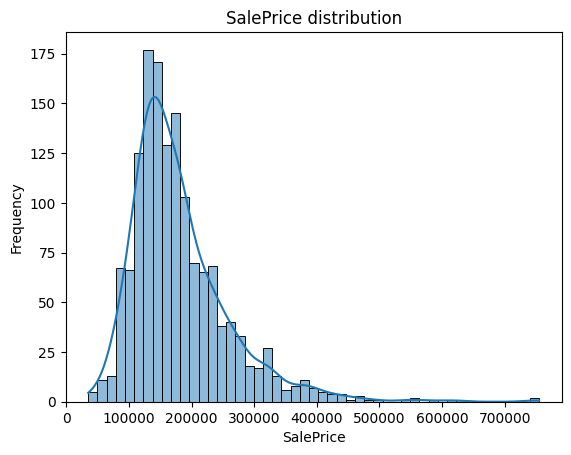

In [208]:
# Check the new distribution 
sns.histplot(train_data['SalePrice'], kde=True)

plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

In [209]:
# Skew and kurt
print("Skewness: %f" % train_data['SalePrice'].skew())
print("Kurtosis: %f" % train_data['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


The target variable is right skewed. We need to transform this variable and make it more normally distributed.

Log-transformation of the target variable

Text(0.5, 1.0, 'SalePrice distribution')

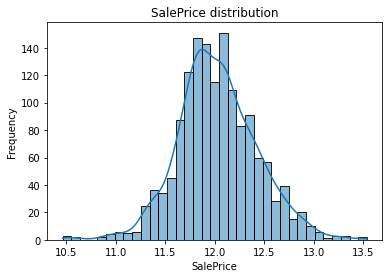

In [44]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train_data["SalePrice"] = np.log1p(train_data["SalePrice"])

# Check the new distribution 
sns.histplot(train_data['SalePrice'], kde=True)

plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

Correlation

/var/folders/cx/hrfxjxts7wbbf24zjv25vwg80000gn/T/ipykernel_13024/2451038363.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = train_data.corr()


<Axes: >

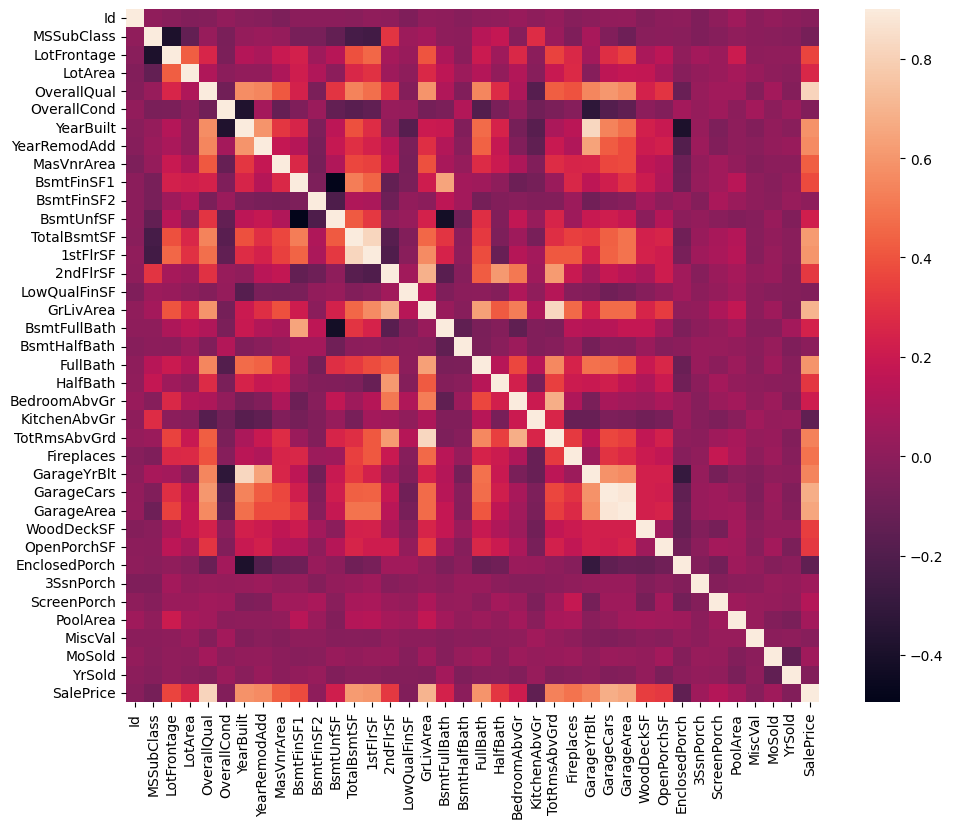

In [211]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train_data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

/var/folders/cx/hrfxjxts7wbbf24zjv25vwg80000gn/T/ipykernel_13024/859977818.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mat = train_data.corr('pearson')


<Axes: >

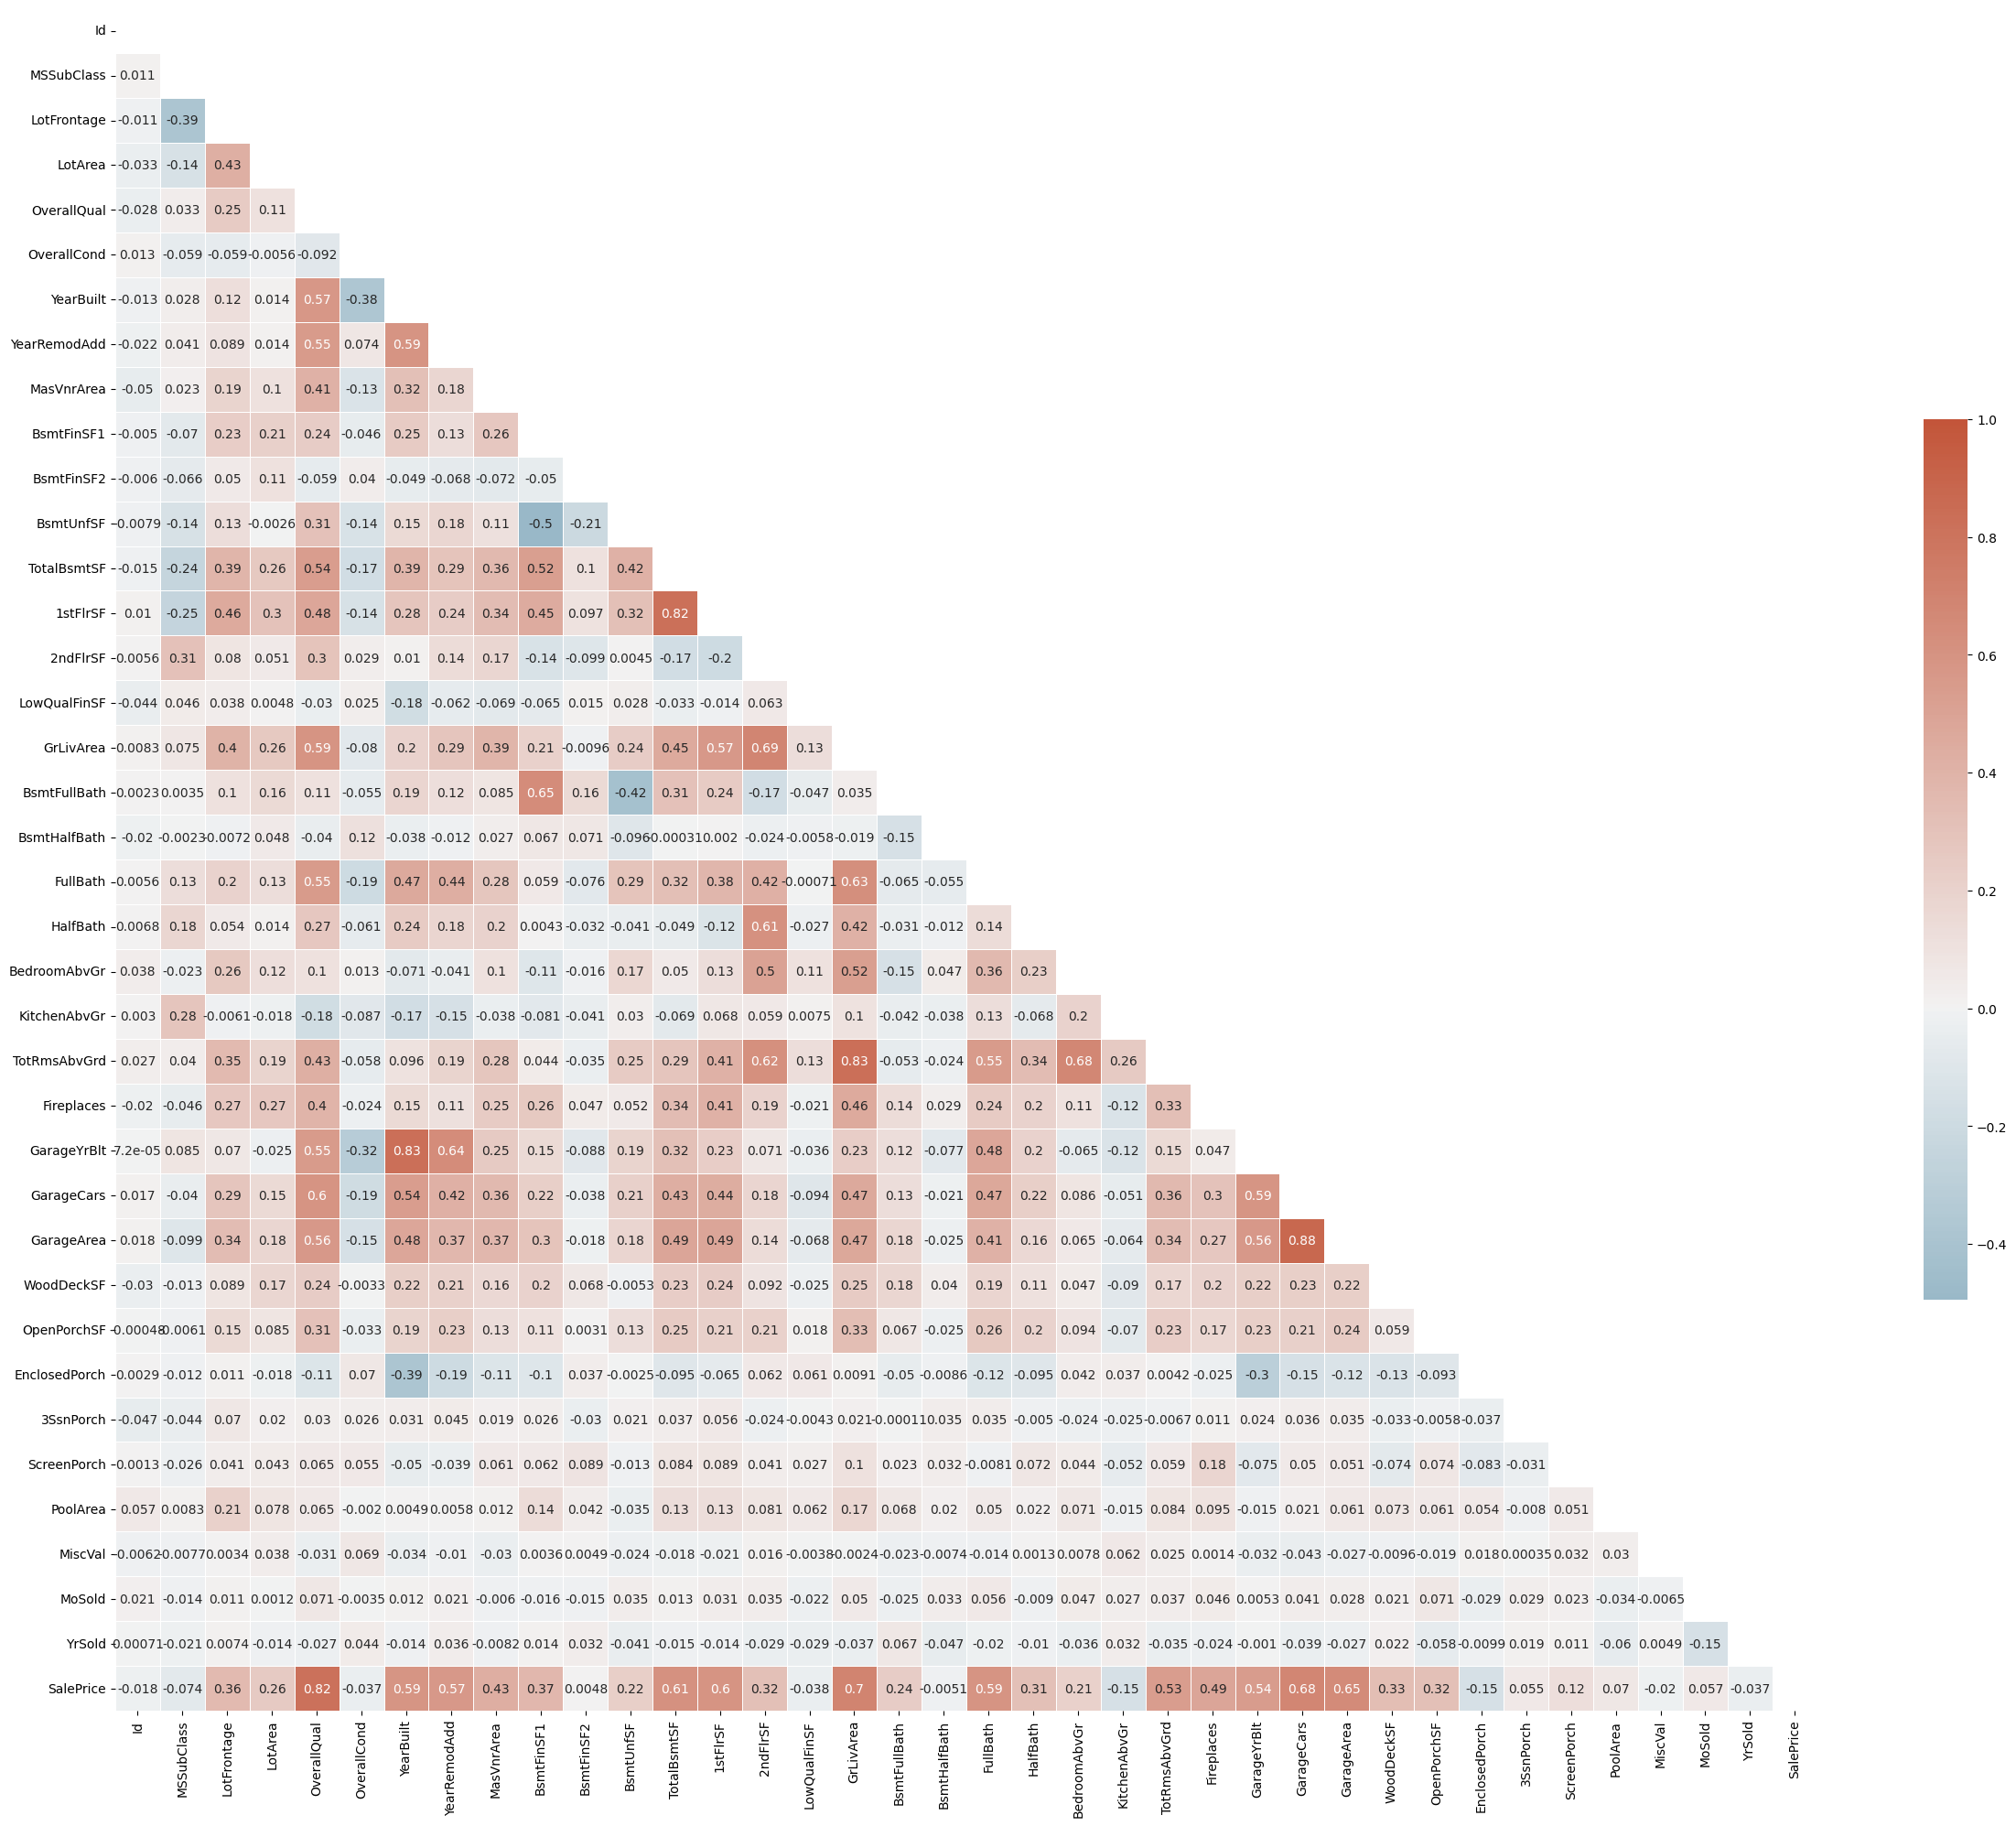

In [212]:
# Correlation Matrix

f, ax = plt.subplots(figsize=(30, 25))
mat = train_data.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [213]:
correlations = train_data.corr()["SalePrice"].abs().sort_values(ascending = False)
correlations.head()

/var/folders/cx/hrfxjxts7wbbf24zjv25vwg80000gn/T/ipykernel_13024/105034525.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = train_data.corr()["SalePrice"].abs().sort_values(ascending = False)


SalePrice      1.000000
OverallQual    0.817185
GrLivArea      0.700927
GarageCars     0.680625
GarageArea     0.650888
Name: SalePrice, dtype: float64

We now know which features correlates most with our target variable we can investigate them more in depth.

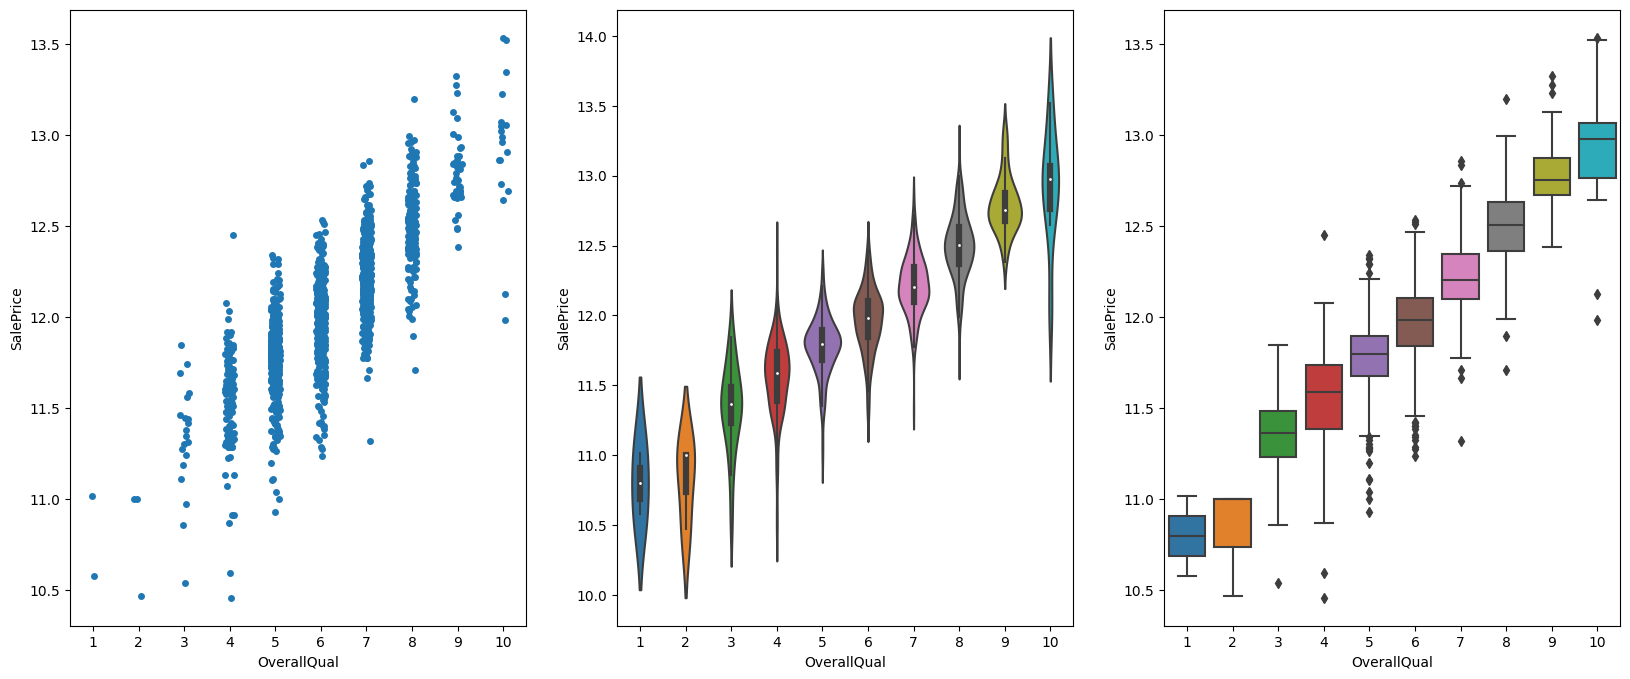

In [214]:
# OverallQuall - SalePrice [corr = 0.82]

figure, ax = plt.subplots(1,3, figsize = (20,8))
sns.stripplot(data=train_data, x = 'OverallQual', y='SalePrice', ax = ax[0])
sns.violinplot(data=train_data, x = 'OverallQual', y='SalePrice', ax = ax[1])
sns.boxplot(data=train_data, x = 'OverallQual', y='SalePrice', ax = ax[2])
plt.show()

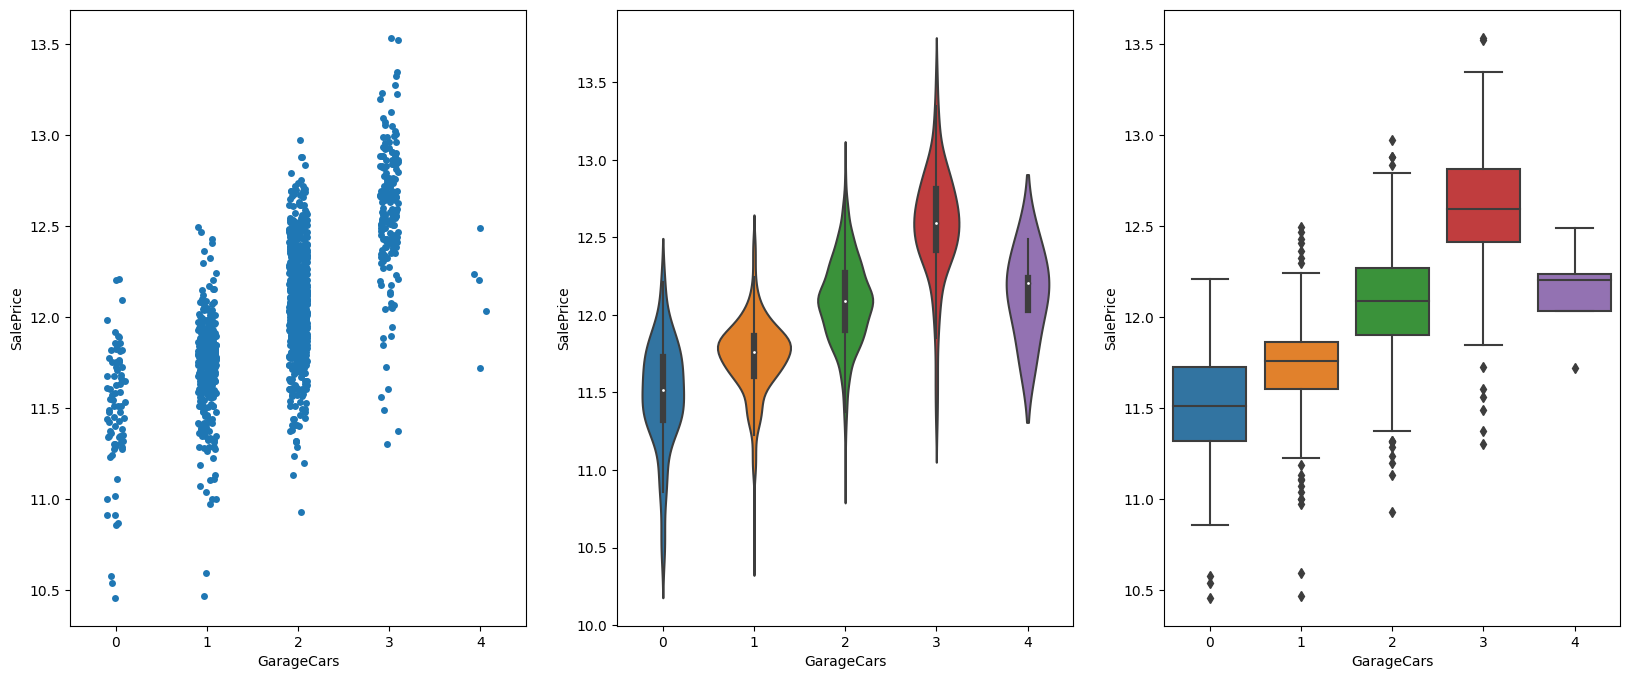

In [215]:
# GarageCars - SalePrice [corr = 0.68]

figure, ax = plt.subplots(1,3, figsize = (20,8))
sns.stripplot(data=train_data, x = 'GarageCars', y='SalePrice', ax = ax[0])
sns.violinplot(data=train_data, x = 'GarageCars', y='SalePrice', ax = ax[1])
sns.boxplot(data=train_data, x = 'GarageCars', y='SalePrice', ax = ax[2])
plt.show()

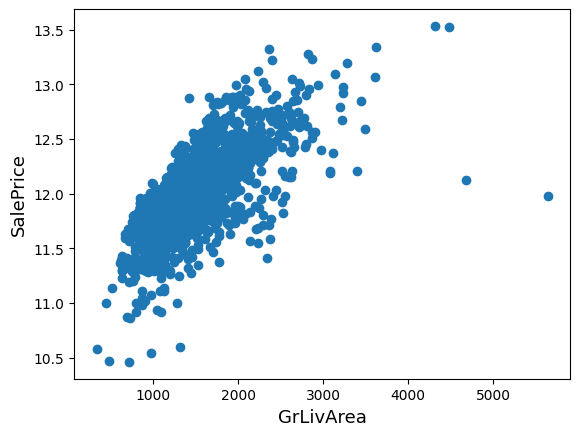

In [216]:
# GrLivArea - SalePrice [corr = 0.7]
fig, ax = plt.subplots()
ax.scatter(x = train_data['GrLivArea'], y = train_data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [45]:
corr_matrix = train_data.corr()

# Choose highly correlated columns
high_corr_cols = corr_matrix['SalePrice'][corr_matrix['SalePrice'] > 0.5].index.tolist()

# Merge columns
merged_col = pd.concat([train_data[col] for col in high_corr_cols], axis=1)

# Rename column
merged_col = merged_col.rename(columns={merged_col.columns[0]: 'Corr_rate'})

train_data = pd.concat([train_data, merged_col.Corr_rate], axis=1)
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Corr_rate
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,12.247699,7
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,12.109016,6
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,12.317171,7
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,2006,WD,Abnorml,11.849405,7
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,12.429220,8


In [46]:
#train_data.dropna(inplace=True)
#test_data.dropna(inplace=True)

print(train_data.shape)
print(test_data.shape)

(1460, 77)
(1459, 75)


In [47]:
from sklearn.model_selection import train_test_split

# Separate the train_data into training and validation sets
X = train_data.drop(['SalePrice'], axis=1) # features
y = train_data['SalePrice'] # target variable
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



In [48]:
# Check the training and validation subsets
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(1168, 76) (1168,)
(292, 76) (292,)


### Machine Learning Pipeline

In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

#### Linear Regression

In [50]:
# Define the column transformer
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [51]:
# Define the pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [52]:
# Fit the pipeline to the training data
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'Ha...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('regressor', LinearRegression())])

In [53]:
# Predict on the validation data
y_val_pred = model.predict(X_val)

In [54]:
# Evaluate the model using R2 and MSE

mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
print("MSE:", mse)
print("R2:", r2)

MSE: 0.016493076781029785
R2: 0.9116178693134085


#### Random Forest

In [227]:
from sklearn.ensemble import RandomForestRegressor

In [228]:
# Define the Pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Define the hyperparameter grid to search over
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [10, 20, 30]
}

In [229]:
# Perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Predict on the validation data using the best estimator
best_pipeline = grid_search.best_estimator_
y_val_pred = best_pipeline.predict(X_val)

KeyboardInterrupt: 

In [ ]:
# Evaluate the model using R2 and MSE

mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
print("MSE:", mse)
print("R2:", r2)

MSE: 0.019914087233602686
R2: 0.8827869459782847


#### Gradient Boosting

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

In [39]:
# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())
])

# Define hyperparameters for the regressor
param_grid = {
    'regressor__learning_rate': [0.1, 0.01, 0.001],
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [2, 3, 4]
}

In [40]:
# Perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Predict on the validation data using the best estimator
best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(X_val)

In [41]:
# Evaluate the model using R2 and MSE

mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print("MSE:", mse)
print("R2:", r2)

MSE: 0.019124280665678797
R2: 0.8975179285513795


#### Support Vector Regression

In [59]:
from sklearn.svm import SVR

In [60]:
# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SVR())
])

# Define hyperparameters for the regressor
param_grid = {
    'regressor__kernel': ['linear', 'rbf', 'poly'],
    'regressor__C': [0.1, 1, 10],
    'regressor__gamma': ['scale', 'auto']
}

In [61]:
# Perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Predict on the validation data using the best estimator
best_pipeline = grid_search.best_estimator_
y_val_pred = best_pipeline.predict(X_val)

In [63]:
# Evaluate the model using R2 and MSE

mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
print("MSE:", mse)
print("R2:", r2)

MSE: 0.017809045655835704
R2: 0.9045659326361744


In [ ]:
# Add the predictions to the test data
test_data["SalePrice"] = y_val_pred

#### Elastic Net Regression

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet())
])

# Define hyperparameters for the regressor
param_grid = {
    'regressor__alpha': [0.1, 1, 10],
    'regressor__l1_ratio': [0.1, 0.5, 0.9]
}

In [ ]:
# Perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Predict on the validation data using the best estimator
best_pipeline = grid_search.best_estimator_
y_val_pred = best_pipeline.predict(X_val)

In [ ]:
# Evaluate the model using R2 and MSE

mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
print("MSE:", mse)
print("R2:", r2)

MSE: 0.01763047868049744
R2: 0.8962281210399223


Seems like Gradient Boosting was the best method, let's try it with a PCA analysis before the gradient boosting.

### PCA & Gradient Boosting

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', TruncatedSVD()),
    ('regressor', GradientBoostingRegressor())
])

# Define hyperparameters for the pipeline
param_grid = {
    'pca__n_components': [10, 20, 30],
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.01, 0.1],
    'regressor__max_depth': [3, 5, 7],
    'regressor__min_samples_split': [2, 4],
    'regressor__min_samples_leaf': [1, 2]
}

In [ ]:
# Perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Predict on the validation data using the best estimator
best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(X_val)

KeyboardInterrupt: 

In [ ]:
# Evaluate the model using R2 and MSE

mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print("MSE:", mse)
print("R2:", r2)

## Linear Regression to predict the Corr_rate for the test_data

In [55]:
t_data1 = train_data.copy()
t_data1.drop(["SalePrice"], axis=1, inplace=True)
t_data1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Corr_rate
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,7
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,6
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,7
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,7
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,8


In [56]:
# Separate the train_data into training and validation sets
X = t_data1.drop(['Corr_rate'], axis=1) # features
y = t_data1['Corr_rate'] # target variable
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Define the column transformer
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [58]:
# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [59]:
# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'Ha...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('regressor', LinearRegression())])

In [60]:
# Predict on the validation data
y_val_pred = pipeline.predict(X_val)

In [61]:
# Evaluate the model using R2 and MSE

mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
print("MSE:", mse)
print("R2:", r2)

MSE: 7.727456548808736e-13
R2: 0.999999999999627


In [62]:
# Generate predictions for the new data
Corr_Score = pipeline.predict(test_data)

In [63]:
test_data["Corr_rate"] = Corr_Score 
test_data.head()   

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Corr_rate
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,5.000000
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,5.999999
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,5.000000
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2010,WD,Normal,6.000000
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,0,0,144,0,0,1,2010,WD,Normal,8.000000


## Export into Submission.csv

In [64]:
# Fit and transform the test data using the preprocessor
test_data_transformed = preprocessor.fit_transform(test_data)

# predict on the test data using the best estimator
y_test_pred = model.predict(test_data)

# Apply the inverse transformation to the predicted 'SalePrice' values
y_test_pred_original_scale = np.expm1(y_test_pred)

In [65]:
# Create a new DataFrame with 'Id' from the test_data and the predicted 'SalePrice' values
submission = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': y_test_pred_original_scale})

# Export the DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)